In [16]:
!pip install gensim==3.8.3
!pip install newspaper
!pip install pyLDAvis

  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (gensim)
  Using cached newspaper-0.1.0.7.tar.gz (176 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package men

In [17]:
import requests
from bs4 import BeautifulSoup
import time
from tqdm import tqdm

def search_articles(company, keyword, api_key, num_articles=100):
    base_url = "https://newsapi.org/v2/everything"
    articles = []
    page = 1

    with tqdm(total=num_articles, desc="Fetching articles") as pbar:
        while len(articles) < num_articles:
            params = {
                'q': f"{company} {keyword}",
                'apiKey': api_key,
                'language': 'en',
                'sortBy': 'publishedAt',
                'pageSize': 100,  # Maximum allowed by NewsAPI
                'page': page
            }
            response = requests.get(base_url, params=params)
            response.raise_for_status()
            data = response.json()

            new_articles = data.get('articles', [])
            if not new_articles:
                break  # No more articles available

            articles.extend(new_articles)
            pbar.update(len(new_articles))

            page += 1
            time.sleep(1)  # To avoid hitting rate limits

    return articles[:num_articles]

def extract_article_content(url):
    try:
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Try to find the main content of the article
        # This is a simple approach and might not work for all websites
        content = ''
        for paragraph in soup.find_all('p'):
            content += paragraph.text + '\n'

        return content.strip()
    except Exception as e:
        print(f"Error extracting content from {url}: {str(e)}")
        return ""

def main(company, keyword, api_key, num_articles=100):
    try:
        articles = search_articles(company, keyword, api_key, num_articles)

        print(f"\nFetched {len(articles)} articles. Now extracting content...")

        results = []
        for article in tqdm(articles, desc="Extracting content"):
            title = article['title']
            url = article['url']
            content = extract_article_content(url)

            results.append({
                'title': title,
                'url': url,
                'content': content
            })

            time.sleep(0.5)  # To be respectful to the websites

        print("\nExtraction complete. Saving results...")

        # Save results to a file
        with open('article_results.txt', 'w', encoding='utf-8') as f:
            for article in results:
                f.write(f"Title: {article['title']}\n")
                f.write(f"URL: {article['url']}\n")
                f.write(f"Content: {article['content'][:500]}...\n")  # First 500 characters
                f.write("\n" + "="*50 + "\n\n")

        print(f"Results saved to 'article_results.txt'. Total articles processed: {len(results)}")

    except Exception as e:
        print(f"An error occurred: {str(e)}")

if __name__ == "__main__":
    api_key = input("Enter your NewsAPI key: ")
    company = input("Enter company name: ")
    keyword = input("Enter keyword: ")
    num_articles = int(input("Enter the number of articles to fetch (minimum 100): "))
    num_articles = max(num_articles, 100)  # Ensure at least 100 articles
    main(company, keyword, api_key, num_articles)

Enter your NewsAPI key: 83a9b15de0f64213b17ac9f300343975
Enter company name: Amazon
Enter keyword: Data Science
Enter the number of articles to fetch (minimum 100): 85


Fetching articles: 100%|██████████| 100/100 [00:01<00:00, 53.84it/s] 



Fetched 100 articles. Now extracting content...


Extracting content: 100%|██████████| 100/100 [01:49<00:00,  1.09s/it]


Extraction complete. Saving results...
Results saved to 'article_results.txt'. Total articles processed: 100


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


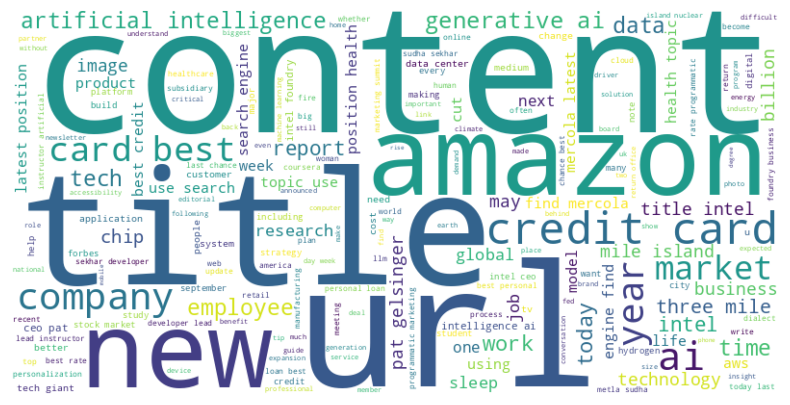

<ipython-input-18-fccad621fc30>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


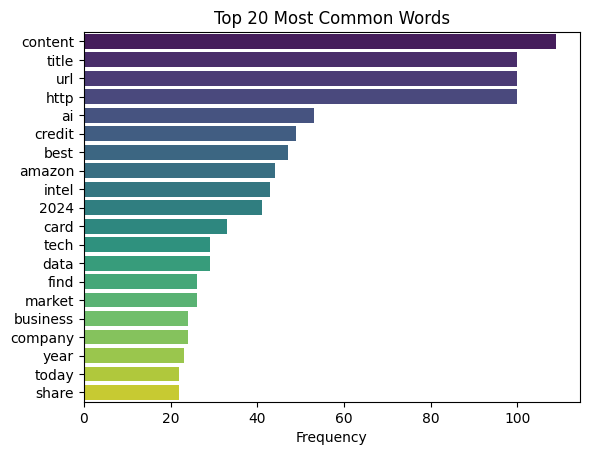

Polarity: 0.18029775584901997, Subjectivity: 0.449041118837468
Named Entities: [('Mercola', 'PERSON'), ('Mercola', 'PERSON'), ('Mercola', 'PERSON'), ('Mercola', 'PERSON'), ('seconds', 'TIME'), ('Pol', 'PERSON'), ('6', 'CARDINAL'), ('San Francisco', 'GPE'), ('AI', 'ORG'), ('https://www.cnbc.com/2024/09/22/jim-cramer-6-things-from-my-san-francisco-trip-reveal-ai-stock-winners.html', 'GPE'), ('0%', 'PERCENT'), ('APR Credit Cards', 'ORG'), ('AI', 'ORG'), ('Radical Reshaping of Your Phone', 'ORG'), ('Westworld and The Expanse', 'WORK_OF_ART'), ('Today', 'DATE'), ('10', 'CARDINAL'), ('2024', 'DATE'), ('Amazon', 'ORG'), ('HSBC Holdings Plc', 'ORG'), ('Barclays Plc', 'ORG'), ('every day of the week', 'DATE'), ('the National Bureau of Ec', 'ORG'), ('3', 'CARDINAL'), ('up to $2,000', 'MONEY'), ('Maegan Driver', 'ORG'), ('Driver', 'ORG'), ('each day', 'DATE'), ('10th', 'ORDINAL'), ('Anniversary Edition Challenges Vaccine Narratives', 'EVENT'), ('Mercola', 'PERSON'), ('Mercola', 'PERSON'), ('Merco

In [18]:
# Import necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis.gensim_models
import spacy

# Download NLTK and Spacy resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load("en_core_web_sm")

# Load the text data
with open("/content/article_results.txt", 'r', encoding='utf-8') as file:
    text = file.read()

# Preprocessing the text
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
tokens = word_tokenize(text.lower())
tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]

# 1. Generate a Word Cloud
def generate_wordcloud(tokens):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 2. Visualizing Most Common Words
def plot_most_common_words(tokens):
    word_freq = Counter(tokens)
    common_words = word_freq.most_common(20)
    words, counts = zip(*common_words)
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title("Top 20 Most Common Words")
    plt.xlabel("Frequency")
    plt.show()

# 3. Sentiment Analysis
def sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")

# 4. Named Entity Recognition
def named_entity_recognition(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# 5. Topic Modeling using LDA with Visualization
def topic_modeling(tokens, num_topics=5):
    dictionary = corpora.Dictionary([tokens])
    corpus = [dictionary.doc2bow(tokens)]

    # Build LDA model
    lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=15)

    # Visualization
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
    pyLDAvis.display(vis)

# Call functions
generate_wordcloud(tokens)
plot_most_common_words(tokens)
sentiment_analysis(text)
entities = named_entity_recognition(text)
print(f"Named Entities: {entities}")
topic_modeling(tokens, num_topics=5)
